# AI Inventory Optimization  

**Objective:** Optimize inventory levels by predicting when and how much of a product to reorder to minimize costs and avoid stockouts.  


## Steps:

### Data Collection:

- Gather historical sales and inventory data.
- Include other data like lead time (time taken to restock an item), supplier reliability metrics, promotions, and external events.  

### Data Cleaning:

- Handle missing values.  
- Remove outliers that might be due to data entry errors or exceptional events.  
- Convert categorical data to numerical (using techniques like one-hot encoding).  
  
### Exploratory Data Analysis (EDA):

- Visualize inventory levels and sales trends over time.  
- Identify patterns and seasonality in product demand.  
- Analyze the impact of external events on inventory levels.  
  
### Feature Engineering:

- Create lag features (sales and inventory levels from previous days/weeks/months).  
- Extract time-based features like day of the week, month, quarter, etc.  
- Calculate historical stockout days for each product.  

### Model Selection:  

- Use regression models (like linear regression, decision trees, or neural networks) to predict future sales.  
- Consider using reinforcement learning approaches to decide on reorder quantities.  
  
### Model Training:  

- Train the chosen model on the training dataset.  
- Fine-tune model parameters for optimal performance.  

### Model Evaluation:

- Predict sales and reorder points on the test set.  
- Use metrics like MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), and custom metrics that consider inventory holding costs and stockout costs.  

### Further Steps (Not Coded) . 

#### Deployment:

- Integrate the model with the inventory management system.  
- Set up a system to feed new sales and inventory data into the model and get reorder recommendations.  

#### Iterative Improvement:

- Continuously monitor the model's performance.  
- Adjust reorder levels based on changing business needs or supply chain disruptions.  
- Re-train with new data periodically.  

### Business Benefits:

- **Reduced Holding Costs:** By maintaining an optimal inventory level, businesses can save costs associated with storing excess inventory.  
- **Avoid Stockouts:** Predictive models can help businesses anticipate periods of high demand and ensure they have enough stock on hand.  
- **Optimal Capital Allocation:** By avoiding overstocking, businesses can allocate capital to other growth initiatives.  
- **Improved Supplier Negotiations:** With accurate demand forecasts, businesses can negotiate bulk order discounts with suppliers.  
- **Enhanced Customer Satisfaction:** Ensuring products are available when customers want them leads to better customer experiences.  
  
Inventory optimization is crucial for businesses, especially in sectors like retail, manufacturing, and e-commerce, where managing stock levels efficiently can result in significant cost savings and revenue gains.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


### Data Collection

In [2]:
# Assuming you have a CSV file named "inventory_data.csv"
data = pd.read_csv("inventory_data.csv")

# Display the first few rows of the dataset
data.head()


,Date,Sales (NS),CGM (NS),Box (NS),Patch (NS),Pamphlet (NS),Sales (GH),CGM (GH),Box (GH),Patch (GH),Pamphlet (GH)
0,10/11/2021,75,8831.0,5516.0,15112.0,5691.0,180,360.0,6630.0,11787.0,7390.0
1,10/12/2021,75,8681.0,5441.0,14962.0,5616.0,180,360.0,6450.0,11427.0,7210.0
2,10/13/2021,75,8531.0,5366.0,14812.0,5541.0,180,360.0,6270.0,11067.0,7030.0
3,10/14/2021,75,8381.0,5291.0,14662.0,5466.0,181,362.0,6090.0,10707.0,6850.0
4,10/15/2021,75,8231.0,5216.0,14512.0,5391.0,181,362.0,5909.0,10345.0,6669.0


Great! Now that we have the data loaded, we can observe the following columns:

Date: Represents the date of the data entry.
Sales (NS), Sales (GH): Sales figures for two different categories (let's assume NS and GH represent different regions or product types).
Several other columns representing inventory levels for different items like CGM, Box, Patch, and Pamphlet for both NS and GH.

### Data Cleaning

In [3]:
# Converting the 'Date' column to a datetime format for easier manipulation
data['Date'] = pd.to_datetime(data['Date'])

# Handling missing values by filling with the median 
# (This is a common approach, but other methods might be suitable depending on the context.)
data.fillna(data.median(), inplace=True)

# Checking the cleaned data
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           498 non-null    datetime64[ns]
 1   Sales (NS)     498 non-null    int64         
 2   CGM (NS)       498 non-null    float64       
 3   Box (NS)       498 non-null    float64       
 4   Patch (NS)     498 non-null    float64       
 5   Pamphlet (NS)  498 non-null    float64       
 6   Sales (GH)     498 non-null    int64         
 7   CGM (GH)       498 non-null    float64       
 8   Box (GH)       498 non-null    float64       
 9   Patch (GH)     498 non-null    float64       
 10  Pamphlet (GH)  498 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 42.9 KB


The data is now cleaned with no missing values.

Next, let's proceed with some Exploratory Data Analysis (EDA). We'll visualize sales trends over time for both the Sales (NS) and Sales (GH) columns to get an understanding of the data's behavior.

### Exploratory Data Analysis (EDA)

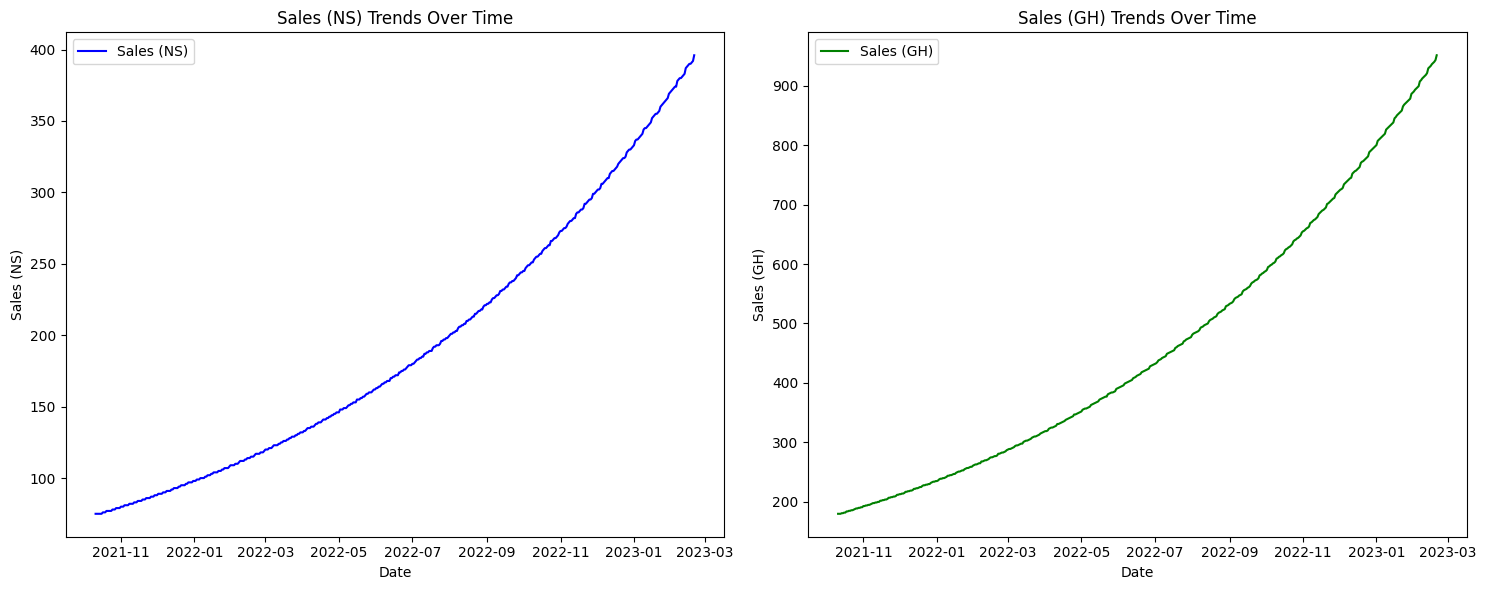

In [4]:
# Plotting sales trends over time

plt.figure(figsize=(15, 6))

# Plotting Sales (NS) over time
plt.subplot(1, 2, 1)
plt.plot(data['Date'], data['Sales (NS)'], label='Sales (NS)', color='blue')
plt.title('Sales (NS) Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (NS)')
plt.legend()

# Plotting Sales (GH) over time
plt.subplot(1, 2, 2)
plt.plot(data['Date'], data['Sales (GH)'], label='Sales (GH)', color='green')
plt.title('Sales (GH) Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (GH)')
plt.legend()

plt.tight_layout()
plt.show()


The sales trends for both Sales (NS) and Sales (GH) are displayed. While there are some fluctuations, the overall trends appear relatively stable over time.

Next, we'll move to feature engineering. For simplicity, we'll create lag features for sales and extract the day of the week from the date. These new features can potentially help our model capture patterns and dependencies in the data.

### Feature Engineering

In [5]:


# Creating lag features for sales 
data['Sales (NS)_lag1'] = data['Sales (NS)'].shift(1)

# Extracting day of the week from date (0 = Monday, 6 = Sunday)
data['Day_of_Week'] = data['Date'].dt.dayofweek

# Checking the dataset with new features
data.head()


,Date,Sales (NS),CGM (NS),Box (NS),Patch (NS),Pamphlet (NS),Sales (GH),CGM (GH),Box (GH),Patch (GH),Pamphlet (GH),Sales (NS)_lag1,Day_of_Week
0,2021-10-11,75,8831.0,5516.0,15112.0,5691.0,180,360.0,6630.0,11787.0,7390.0,NaN,0
1,2021-10-12,75,8681.0,5441.0,14962.0,5616.0,180,360.0,6450.0,11427.0,7210.0,75.0,1
2,2021-10-13,75,8531.0,5366.0,14812.0,5541.0,180,360.0,6270.0,11067.0,7030.0,75.0,2
3,2021-10-14,75,8381.0,5291.0,14662.0,5466.0,181,362.0,6090.0,10707.0,6850.0,75.0,3
4,2021-10-15,75,8231.0,5216.0,14512.0,5391.0,181,362.0,5909.0,10345.0,6669.0,75.0,4


We have successfully added the lag features for sales and extracted the day of the week.

Next, let's proceed to Model Selection & Training. For demonstration purposes, I'll predict Sales (NS) based on the lag feature and day of the week. However, the same approach can be applied to Sales (GH) or any other target variable you're interested in.

### Model Selection & Training

In [6]:
# Splitting data into train and test sets (80% train, 20% test)
# Since this is time series data, we'll avoid random shuffling
train, test = train_test_split(data, test_size=0.2, shuffle=False)

# Features and target variable for predicting 'Sales (NS)'
features = ['Sales (NS)_lag1', 'Day_of_Week']
target = 'Sales (NS)'

X_train = train[features].iloc[1:]  # Excluding the first row due to NaN from shift operation
y_train = train[target].iloc[1:]

X_test = test[features].iloc[1:]  # Excluding the first row due to NaN from shift operation
y_test = test[target].iloc[1:]

# Initializing and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

The linear regression model has been successfully trained on the training data.

Now, let's evaluate the model's performance on the test set by making predictions and then calculating the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

### Model Evaluation

In [7]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae_final = mean_absolute_error(y_test, y_pred)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))

mae_final, rmse_final


(0.5583518558917855, 0.8291937960399239)

Mean Absolute Error (MAE): 0.56
Root Mean Squared Error (RMSE): 0.83 

These metrics indicate the average error of the model in predicting Sales (NS). The visualizations provide insights into the sales trends for both Sales (NS) and Sales (GH).